In [43]:
from langchain import PromptTemplate, LLMChain
from langchain.llms import OpenAI
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate
from langchain_anthropic import ChatAnthropic

llm = OpenAI(temperature=0.9)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from tagger import Evaluations

cl = pd.read_csv('../results/validation_full.csv')
# Average the 'zero_shot', 'zero_shot_claude', 'xgb', and 'length_lr' columns to create "final_results"
cl['final_results'] = cl[['zero_shot', 'zero_shot_claude', 'xgb', 'length_lr']].mean(axis=1)


eval = Evaluations()
print("accuracy via zero-shot claude", eval.evaluate(cl, predict_col="zero_shot_claude"))
print("accuracy via zero-shot gpt-4o", eval.evaluate(cl, predict_col="zero_shot"))
print("accuracy via xgb", eval.evaluate(cl, predict_col="xgb"))
print("accuracy via length_lr", eval.evaluate(cl, predict_col="length_lr"))

accuracy via zero-shot claude 57.89473684210527
accuracy via zero-shot gpt-4o 39.473684210526315
accuracy via xgb 71.05263157894737
accuracy via length_lr 64.47368421052632


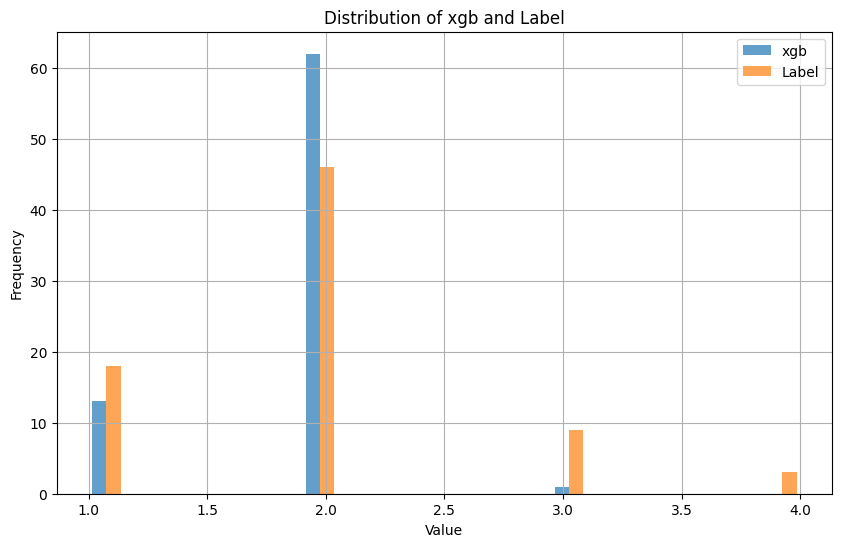

In [108]:
d# Show distribution of xgb and label
plt.figure(figsize=(10, 6))
plt.hist([cl['xgb'], cl['Label']], bins=20, label=['xgb', 'Label'], alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of xgb and Label')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from tagger import Evaluations

tagged = pd.read_csv('../results/validation_tagged_claude.csv')
eval = Evaluations()

tagged=tagged[tagged['Valid']==True]
print("accuracy via zero-shot claude", eval.evaluate(tagged, predict_col="zero_shot_claude"))
print("accuracy via zero-shot gpt-3", eval.evaluate(tagged, predict_col="zero_shot"))

tagged_4o = pd.read_csv('../results/validation_tagged_4o.csv')
tagged_4o=tagged_4o[tagged_4o['Valid']==True]
print("accuracy via zero-shot gpt-4o", eval.evaluate(tagged_4o, predict_col="zero_shot_4o"))



accuracy via zero-shot claude 57.89473684210527
accuracy via zero-shot gpt-3 39.473684210526315
accuracy via zero-shot gpt-4o 34.21052631578947


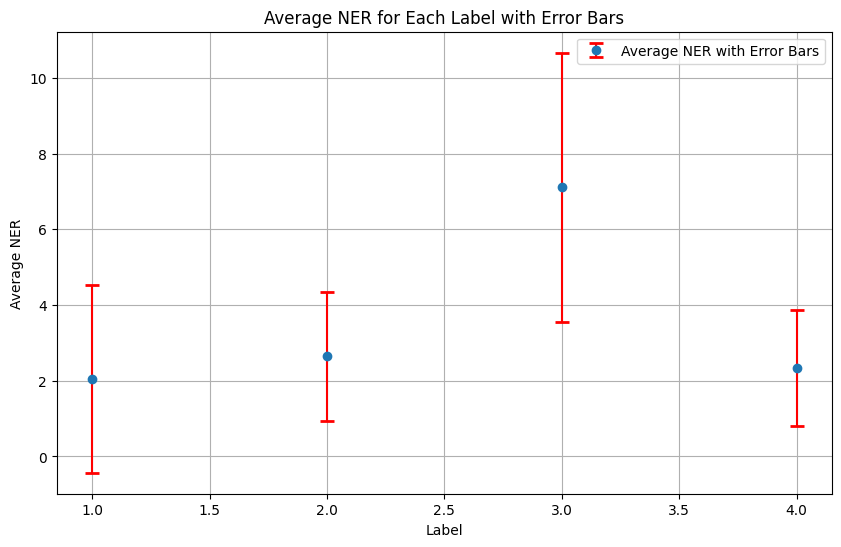

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
validation_ner = pd.read_csv('../results/validation_ner.csv')

# Calculate the average value of "ner" for each different value in "Label"
average_ner = validation_ner.groupby('Label')['ner'].mean()
std_ner = validation_ner.groupby('Label')['ner'].std()

# Plot these values with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(average_ner.index, average_ner, yerr=std_ner, fmt='o', capsize=5, capthick=2, ecolor='red', label='Average NER with Error Bars')
plt.xlabel('Label')
plt.ylabel('Average NER')
plt.title('Average NER for Each Label with Error Bars')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
import os
from langchain_anthropic import ChatAnthropic

# Set the API key for langchain_anthropic ChatAnthropic

llm_claude = ChatAnthropic(model='claude-3-opus-20240229')


In [84]:
three_examples = [
    {
        "question": "Deploying multiple smaller models in parallel for Confidence Code calculation is a clever strategy. How do you plan to handle the integration of these multiple models' outputs and the Confidence Code calculation into a cohesive and easily interpretable response for the end user?",
        "answer": """
So I think in different models, like let's say we have Mistral Gemma and llama we can deploy them. There are already API Services which provide you access to different these different models. In initialized different instances for you, so that can be directly done or we can deploy these models using AWS AWS specifically instances that can be used to deploy large language models. and using these Services we can apply these models easily and if there are a lot of users interacting with these models, so AWS also provides auto-scaling autoscaling methods that automatically scales the number of requests that can be handled by a particular system. So and all the pre-processing that is done, like combining model outputs from combining outputs from different model can be done on like using a different API and kind of Ah, like creating a simple fast API based method for handling requests. So this basic first API will get the input from user create a prompt send this prompt create different prompts for different models hit different apis which are which have different models deployed on them get the results from their and then this calculates a score and create a separate. And create the final output or what we can do is once we get outputs from the smaller models, we can combine them together and ask another large language model to summarize those results or to giving these outputs how to better. What is the best response that can be provided to the users giving outputs and scores from different small skin models.
""",
    },
    {
        "question": "Great! Let's dive into your resume. I see you've done some interesting work with IoT malware detection and face mask detection using deep learning. Can you elaborate on the specific deep learning models you used for these projects and why you chose them?,",
        "answer": """
        So first of all in my iot malware detection project, I use the I use the Deep learning CNN model which which is I used to know I tried I tried and tried to implement various models such as vgt 16 PG 19 and instruction V3 and out of them gdg, 16 gave the best accuracy. So I did some hyperparameter tuning and the and the atom Optimizer of bg16 gave the best result which was 96.3% accuracy. And in my face mask detection. I used last night 50 grass that 101 that's that institution. No Inception weekly and vgg 16 and we did 19 out of which again, we need 16 the iron model if the best I am super Optimizer, which was 19917.
        """
    },
    {
        "question": "It sounds like you've had a comprehensive experience with web scraping, data cleaning, and model integration. You mentioned using the RAG (Retrieval-Augmented Generation) technique for question answering. Could you elaborate on how you implemented RAG in your project and what challenges you faced while integrating it with the data from your database?",
        "answer": """
        Are retrievable augmented generation is basically we retrieve the data suppose if we take any website, we scrape the data and then clean it and then we split the data into small small chunks of sizes. And these chunks could be done using many techniques one will be like recursive character testing and there is token testing for the first time we have used with recursive character testing technique where we split the characters and until some special characters are engaged in the test, like multiple level lines symbols or something like that and these small small chunks are then I can if I if you want a general overview, they will be like 150 token or size in length. And these are given to add as 002 that will convert the test into embeddings and these embeddings are stored as postgres vectors. And whenever user gives a query in our chatbot, the chatbot is again converted as an embedding using the add as 002 and this same embedding is to the other posters DB and we made calls in the Prisma. Okay, and the similar to between the various available in the TV is done with this user query and whatever the top five we specifically chose the top five chunks which are similar to this user query. Are achieved and they were sent again back to charge EBT for generalizing them. Like we may not know like if we have got five 150 character test. After length, so these are given to rgbt for enhancing the user readability like take this five chunks of content and make it meaningful. So that meaningful answers are given back to the user and like this we have done with that static website based answers real-time answers like crypto price. And what is the latest defi data like exchanging information particular coin prices on different exchanges. Please kind of answers it can generate.
        """
    },
    {
        "question": "Certainly! In Python, the ""yield"" keyword is used in the context of defining a generator function. When you use ""yield"" in a function instead of ""return"", it transforms the function into a generator. The key difference is that ""return"" terminates a function and sends a specified value back to its caller, while ""yield"" pauses the function, saves its state, and then continues from where it left off the next time it's called. This ability to pause and resume execution is what makes generators memory efficient, as they don't need to store all their values in memory at once. Instead, they generate values on the fly, which can significantly reduce memory usage, especially with large datasets or computations. Given this explanation, how might you now consider using the ""yield"" keyword in your Python projects, particularly in the context of AI and ML where memory efficiency is a concern?",
        "answer": """
        Yes, so I said that I'm doing a project related to Active Learning methodologies right in this actual learning methodologies. What we do is we don't train the model with the entire data set first. We train with the small Point small set of data set. We calculate the representative less information less scores using uncertainty sampling method and we Give it to the user to label them. And again, we'll retrain with the new label dataset in this country text finding information and representativeness, which is a combination of entropy marginal difference and tsne pay us similarities everything. We have to pass the many images to those functions so which is not so memory efficient. So I would like to use this New Concept which is you said as a converting the function to the generator using the ill function, I would definitely use this concept in my actual learning project which can minimize so much of my memory usage because I was using literally a 10000 300 images for my training data so I can leverage my memory efficiency by using this generator concept. Well, so thank you for that. Europe
        """
    },
    {
        "question": "Great! I see from your resume that you've been working on improving demand forecasting at THOUCENTRIC. Can you tell me about a specific machine learning model you've implemented for this purpose and how you integrated it with the existing system?,",
        "answer": """
        See the project is for a client PMI and the objective is to find the optimal with the objective is to predict an optimal value of the illicit trade that will happen in the next three years and the data that we had was that annual level. So we had around 10 or 12 year data depending upon the markets. So for let's say for some Market. We have 10 here data while for other we have eight here data something like this. So the objective is to just predict illicit trade that will happen in the next couple of years. For this what we did was we we cannot use the complex model like LG Boost or xgboost since we have very less data points. We have around 10 data points. So the only way is to go with the regression model. We had tried with various regression model and we finally opted for the Richard creation. Now what we did over there was we created a lot of simulations on different features. We had also done an extensive feature engineering depending upon the market. So let's say there's a market which has a factory of which is a few factors that generate those. Is it tobacco's or counterfeit products then what we did was We Gather the data. From the beginning the data and asking them that what should admit which rate the factories are getting closed. So using that metric we forecasted for that is specific market now since 2020 was a covid year. We had thought of using an using a new feature as a covid. So let's say it is a category Feature Feature like anomaly yes, or false so for 2021 and 22 early we had used as true. To check with that model like how it performs like since it is a normally ER people right go with the cheaper variant rather than the original one, or if you take into account the annual household median income at data that we got it from Oxford social economic data. it gives the data for how European market and Yeah. also, we are taking into account the GDP per capita of a Nation since the it's a high. Since this let's say if the GDP is increasing constantly over in here, then most most likely that these condition of people will increase the living condition of people will increase and hence. They will buy. They will buy a original product rather than buying a counterfeit one or illicit one. Apart from it since the major things that the issue that we faced was in certain markets where the the effect of covid was quite large. So for that we had done a few extensive. Feature engineering which had included the median household income and there was one more factor for European markets like they had open borders. So let's say a protein has been manufactured in nation a they can just take the product in the cartridge and ship it to Nation B. And set it over there that let's say 50% cheap price. So we had also taking into account of the price and the data of the neighboring countries presents neighboring countries for this. Yeah, and that's it for
        """
    },
]

In [85]:
def create_three_formatter(question):
    example_prompt = PromptTemplate(
        input_variables=["question", "answer"], template="Question: {question}\n{answer}"
    )


    #  Use a few technical terms, but do not answer as an expert. Answer at around the level of a mediocre new engineer that is a little bit unsure of their response. 
    prompt = FewShotPromptTemplate(
        examples=three_examples,
        example_prompt=example_prompt,
        prefix="""You are an interviewee who is giving a response to an interview question. Here's are some examples of how you should answer: """,
        suffix="""
Now, using the kind of quality and type of speech presented in the examples above, please answer the following question as a mediocre new engineer. Don't use technical terms. Keep the response strictly under 200 words, format it as if you were speaking out loud, and use run on sentences:

Question: {input}""",
        input_variables=["input"],
    )

    formatter = prompt.format(input=question)
    
    return formatter

In [86]:
question = "Utilizing the Mahalanobis distance and p-values for coherence testing is a sophisticated method. How did you determine the threshold for the p-value to establish the coherence of the data sources? Additionally, in the context of financial data, were there specific features or patterns you focused on to ensure that the synthetic data remained representative of the original data, especially in terms of its utility for training AI models?"

three_formatter = create_three_formatter(question)

In [87]:
from langchain_community.llms import HuggingFacePipeline
three_formatter = create_three_formatter(question)
three = llm_claude.invoke(three_formatter)
three

AIMessage(content='Okay, so for the Mahalanobis distance and p-values, we basically just tried out different thresholds and saw what worked best, it was kind of a trial and error process, you know? We wanted to make sure the data sources were coherent but not too strict that we filtered out too much. And for the financial data, we mainly looked at things like the overall trends and distributions of key variables like stock prices, trading volumes, stuff like that. We wanted the synthetic data to have similar patterns and relationships as the real data so the AI models would learn the right things from it. It took some tweaking and testing to get it right but in the end we found a good balance that kept the important features while still protecting privacy and all that. So yeah, it was a lot of experimentation and iteration to dial in those thresholds and focus areas but we got there eventually and the synthetic financial data ended up working pretty well for the AI training, so that wa

In [88]:
three = "Well, when using Mahalanobis distance we look at the p-value, right? And it can be tricky because there isn't like a specific set threshold for the p-value. You kinda gotta determine that yourself based on the data and what makes sense for your specific context. So for this project, I analyzed the data sources and looked at patterns in the financial data to determine the appropriate p-value threshold. And it was definitely a challenge because we wanted to make sure the synthetic data was coherent with the original data so that it could be used for training AI models. I mean, that's the whole point, right? So we focused on features and patterns in the data that were most relevant to the financial context, like maybe patterns in stock prices or interest rates or stock market fluctuations. And we made sure that the synthetic data matched up with these features and patterns to maintain its representation of the original data. It was definitely a lot of trial and error, but in the end, we were able to find a good balance between coherence and utility for AI model training."


In [89]:
original = "So specifically we used heuristics from Finance such as a volatility surface Arbitrage check. So volatility surface must have arbitrage-free must be arbitrage-free. So we would have checks for calendar Arbitrage and Butterfly Arbitrage that we would check to make sure that our generative data was correctly. And coherently generated the p-values were done empirically so I would create inflated data that I knew for a fact did not come from the distribution and I would check to see whether or not it's just specific p-value was able to reject AKA x amount of the time and then I would permute the data either leave some in or take some out and recalculate the p-value to see if I would go back and get the exact same decision for that value. And in some summary we came up with 0.025, which is a lot stronger than 0.05 as a metric because data from Financial authorities are Financial distributions tend to be skewed."

In [97]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

def llm_bool(question, responses):

    long_prompt = """
    Evaluate the technical quality of the two responses to a technical question. Focus on the use of technical terms, the clarity of the explanation, and the depth of the approach discussed. An ideal response should meaningfully discuss key technologies, methodologies, and frameworks, and choose an optimal level of technicality for the given use case. Consider the following criteria for evaluation:

    1. **Technical Terms:** Does the response correctly use relevant technical terms and concepts? The better response will include many more technical terms.
    2. **Depth:** Does the response provide sufficient detail and technical depth in describing the approach? The better response will likely be longer and highlight different technical terms. 

    Based on these criteria, determine which response is better. Return "Response 1 is better" if the first response is clearly better, "Response 2 is better" if the second response is clearly better, and "Comparable" if the two responses could be argued to be equally good.
    """
    
    options = {
        "description": long_prompt,
        "enum": ["Response 1 is better", "Response 2 is better", "Comparable"]
        # "enum": ["Better", "Comparable", "Worse"]
    }
    description, enum = options["description"], options["enum"]

    tagging_prompt = ChatPromptTemplate.from_template(
        """
    You are given a question and two responses to a technical interview question to compare. 

    Only compare based on the properties mentioned in the 'Comparison' function.
    
    Question:
    {question}

    First Response:
    {first_resp}
    
    Second Response:
    {second_resp}
    """
    )
    
    class Comparison(BaseModel):
        rating: str = Field(
            description=description,
            enum=enum,
        )

    # llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo").with_structured_output(
    #     Comparison
    # )
    # llm = llm_claude
    llm = ChatAnthropic(model='claude-3-opus-20240229').with_structured_output(
        Comparison
    )

    chain = tagging_prompt | llm

    result = chain.invoke({"question": question, "first_resp": responses[0], "second_resp": responses[1]})
    
    return result.rating


In [98]:
llm_bool(question, responses=[three, original])

'Response 2 is better'

In [99]:
import pandas as pd
top_half = pd.read_csv("../data/train_valid_all.csv")
top_half = top_half[["Label", "Question", "Response", "Prediction", "Valid"]]

# sample one of each
run = top_half.groupby('Label').apply(lambda x: x.sample(n=1, random_state=3)).reset_index(drop=True)

# run = top_half[top_half['Prediction'] == 3].sample(n=10, random_state=1)

# sample 1s
# run = top_half[top_half['Label'] == 1].sample(n=5, random_state=2)

# sample 2s
# top_half = top_half[top_half['Label'] == 2].sample(n=5, random_state=1)

# sample 3s
# run = top_half[top_half['Label'] == 3].sample(n=5, random_state=1)

# sample 4 and 5
# run = top_half[top_half['Label'] >= 4].sample(n=5, random_state=1)

# sample 5s
# run = top_half[top_half['Label'] == 5]


def apply_llm_bool_to_dataframe(df):
    def process_row(row):
        question = row["Question"]
        three_formatter = create_three_formatter(question)
        
        results = []
        for _ in range(5):
            
            generated = llm_claude.invoke(three_formatter)
            result = llm_bool(question, responses=[generated, row["Response"]])
            results.append(result)
            
            if _ == 0:
                print("Generated Response:", generated)
                print("\nTrue Response:", row["Response"])
                print("\n\n")
        
            
        row["three_bool"] = results
        # Print one of the three generated responses and the true response
        
        # Save the row to CSV after processing
        row.to_frame().T.to_csv('processed_results.csv', mode='a', header=False, index=False)
        
        return row

    return df.apply(process_row, axis=1)

result = apply_llm_bool_to_dataframe(run)


Generated Response: content="So when it comes to like working with large datasets in Python, there's definitely a bunch of different libraries and frameworks out there that can help make things more efficient and faster. I mean, you've got stuff like Pandas and NumPy which are pretty popular for this kind of thing. With Pandas, it's really good for like manipulating and analyzing data, and it's got a lot of built-in functions that can help with memory management and speeding things up. And then NumPy is great for doing numerical computations on large arrays and matrices, and it's designed to be super fast and memory efficient. So I guess if I was working on a project with a big dataset, I'd probably start by loading it into a Pandas DataFrame and then using some of the functions in there to like clean up the data and get rid of any unnecessary stuff. And then if I needed to do some heavy computations, I could convert the relevant columns into NumPy arrays and work with those to make th

In [100]:
for i in result["three_bool"]:
    from collections import Counter
    counts = Counter(i)
    sorted_counts = dict(sorted(counts.items()))
    print(sorted_counts)
# one_top_half

{'Response 1 is better': 5}
{'Response 1 is better': 2, 'Response 2 is better': 3}
{'Response 1 is better': 2, 'Response 2 is better': 3}
{'Response 1 is better': 3, 'Response 2 is better': 2}
{'Response 2 is better': 5}


In [101]:
result

,Label,Question,Response,Prediction,Valid,three_bool
0,1,Leveraging Python's dynamic data types and mem...,Okay pandas and numpy are the two Frameworks d...,3,True,"[Response 1 is better, Response 1 is better, R..."
1,2,Your detailed explanation of how you applied t...,Actually more YOLO was very very good model. A...,3,True,"[Response 2 is better, Response 2 is better, R..."
2,3,What potential trade-offs or compromises might...,"So first, I'll I'll work with a very small dum...",4,True,"[Response 1 is better, Response 2 is better, R..."
3,4,That sounds like a solid high-level approach. ...,"Okay. So one major challenge was that, the dat...",3,True,"[Response 1 is better, Response 2 is better, R..."
4,5,Great! I see from your resume that you've work...,"Sure, so the current problem that I faced doin...",4,True,"[Response 2 is better, Response 2 is better, R..."


Rows with Prediction 1 or 2 and Label in (1, 2): 436
Rows with Prediction 3-5 and Label in (3, 4, 5): 116
0.69


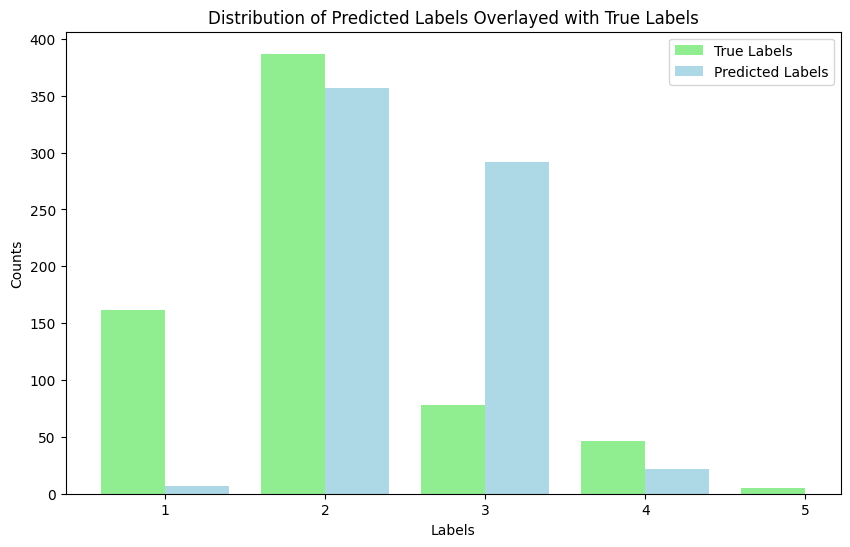

In [37]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../data/train_tagged.csv')

# Count rows with "Prediction" 1 or 2 and label in (1 or 2)
count_pred_1_2_label_1_2 = len(df[(df['Prediction'].isin([1, 2])) & (df['Label'].isin([1, 2]))])

# Count rows with "Prediction" 3-5 and label in (3, 4, 5)
count_pred_3_5_label_3_5 = len(df[(df['Prediction'].isin([3, 4, 5])) & (df['Label'].isin([3, 4, 5]))])

print(f"Rows with Prediction 1 or 2 and Label in (1, 2): {count_pred_1_2_label_1_2}")
print(f"Rows with Prediction 3-5 and Label in (3, 4, 5): {count_pred_3_5_label_3_5}")

print((436 + 116) / 800)

import matplotlib.pyplot as plt
df = pd.read_csv('../data/train_with_valid_classification.csv')

# Filter the dataframe to only include rows where 'Valid' is True
valid_df = df[df['Valid'] == True]

# Count the occurrences of each label and prediction in the filtered dataframe
true_label_counts = valid_df['Label'].value_counts().sort_index()
pred_label_counts = valid_df['Prediction'].value_counts().sort_index()

# Plot the distribution of true labels
plt.figure(figsize=(10, 6))
plt.bar(true_label_counts.index - 0.2, true_label_counts.values, width=0.4, label='True Labels', align='center', color='lightgreen')

# Plot the distribution of predicted labels
plt.bar(pred_label_counts.index + 0.2, pred_label_counts.values, width=0.4, label='Predicted Labels', align='center', color='lightblue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Predicted Labels Overlayed with True Labels')
plt.legend()

# Show the plot
plt.show()



76
0


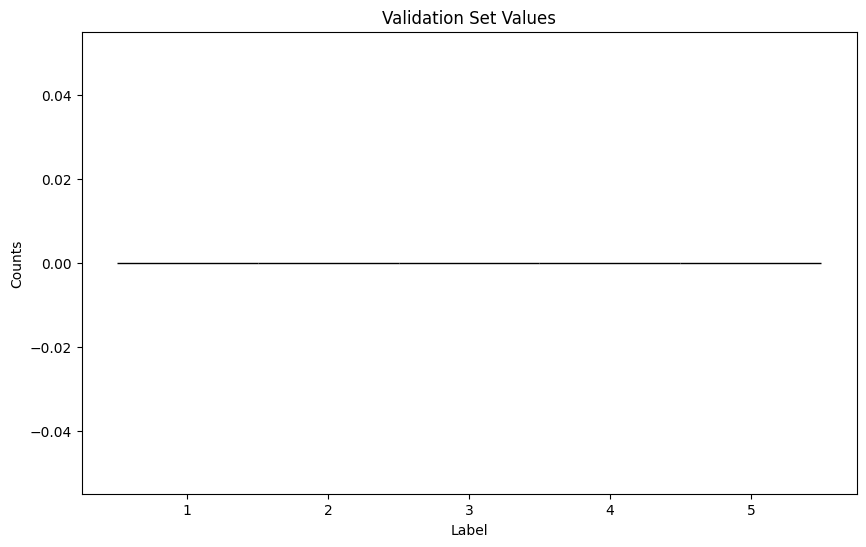

In [62]:
v = pd.read_csv("../results/validation_tagged.csv")
import matplotlib.pyplot as plt

print(len(v))


# Filter the dataframe to only include rows where 'Valid' is False
invalid_df = v[v['Valid'] == False]

print(len(invalid_df))

# Plot the histogram of the 'Prediction' values for invalid responses
plt.figure(figsize=(10, 6))
plt.hist(invalid_df['Label'], bins=range(1, 7), edgecolor='black', color='lightblue', align='left')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Validation Set Values')

# Show the plot
plt.show()
